In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE,SMOTEN

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [527]:
model_details = []
testing_accuracy_list = []
training_accuracy_list = []

In [634]:
# Function Definition

def outlier_imputation(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3-q1
    uppertail = q3 + 1.5*iqr
    lowertail = q1 - 1.5*iqr
    
    median = df.loc[(df <= uppertail) & (df >= lowertail)].median()
    df.loc[(df < lowertail) | (df > uppertail)] = median
    
    return sns.boxplot(y=df)

def normalization(x_df):
    normal_scaler = MinMaxScaler()
    array = normal_scaler.fit_transform(x_df)

    x_normal_df = pd.DataFrame(array,columns=x_df.columns)
    return x_normal_df

def adaboost_clf_training(x_train,y_train):
    adaboost_clf = AdaBoostClassifier(estimator=LogisticRegression(),random_state=39)
    adaboost_clf.fit(x_train,y_train)
    model_details.append(model_name)
    return adaboost_clf

def dt_clf_training(x_train,y_train):
    dt_clf = DecisionTreeClassifier(random_state=18)
    dt_clf.fit(x_train,y_train)
    model_details.append(model_name)
    return dt_clf

def model_evaluation_testing(model,x_test,y_test):
    y_pred_test = model.predict(x_test)
    print("*"*50,"Testing Data","*"*50)
    
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    print("The confusion Matrix is :\n",cnf_matrix)
    cmd = ConfusionMatrixDisplay(cnf_matrix)
    cmd.plot()
    plt.show()
    print("="*50)
    
    accuracy = accuracy_score(y_test,y_pred_test)
    print("The Accuracy is : ",accuracy)
    print("="*50)
    
    clf_report = classification_report(y_test,y_pred_test)
    print("The Classification report is :\n",clf_report)
    
    testing_accuracy_list.append(accuracy)
    
    
def model_evaluation_training(model,x_train,y_train):
    y_pred_train = model.predict(x_train)
    print("*"*50,"Training Data","*"*50)
    
    cnf_matrix = confusion_matrix(y_train,y_pred_train)
    print("The confusion matrix is :\n",cnf_matrix)
    cmd = ConfusionMatrixDisplay(cnf_matrix)
    cmd.plot()
    plt.show()
    print("="*50)
    
    accuracy = accuracy_score(y_train,y_pred_train)
    print("The accuracy is : ",accuracy)
    print("="*50)
    
    clf_report = classification_report(y_train,y_pred_train)
    print("The classification Report is :\n",clf_report)
    
    training_accuracy_list.append(accuracy)
    
def get_auc_roc_curve(model,x_train,y_train):
    y_pred_prob = model.predict_proba(x_train)
    pred_prob = y_pred_prob[:,1]
    
    fpr, tpr, thresh = roc_curve(y_train,pred_prob)
    
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic Curve")
    plt.show()
    
    auc_value =auc(fpr,tpr)
    print("The AUC is : ",auc_value)
    
def dt_gscv_best_estimator(x_tarin,y_train):
    dt_clf = DecisionTreeClassifier()
    par_grid = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(8,13),
                 "min_samples_leaf": np.arange(5,10)}
    
    gscv_dt_clf = GridSearchCV(dt_clf,par_grid,cv=5,n_jobs=-1)
    gscv_dt_clf.fit(x_tarin,y_train)
    
    model_details.append("Hyperparameter Tunned GSCV model")
#     best_parameters.append(gscv_adb_clf.best_params_)
    
    return gscv_dt_clf.best_estimator_

def dt_rscv_best_estimator(x_train,y_train):
    dt_clf = DecisionTreeClassifier()
    par_grid = {"criterion":['gini', 'entropy'], 
                 "max_depth": np.arange(3,8),
                 "min_samples_split": np.arange(2,20),
                 "min_samples_leaf": np.arange(2,15)}
    
    rscv_dt_clf = RandomizedSearchCV(dt_clf,par_grid,cv=5,n_jobs=-1)
    rscv_dt_clf.fit(x_train,y_train)
    
    model_details.append("Hyperparameter Tunned RSCV model")
#     best_parameters.append(rscv_adb_clf.best_params_)
    
    return rscv_dt_clf.best_estimator_
    
def adb_gscv_best_estimator(x_tarin,y_train):
    adb_clf = AdaBoostClassifier()
    par_grid = {"n_estimators":np.arange(50,51),
               "learning_rate":np.arange(0,1,0.001)}
    
    gscv_adb_clf = GridSearchCV(adb_clf,par_grid,cv=5,n_jobs=-1)
    gscv_adb_clf.fit(x_tarin,y_train)
    
    model_details.append("Hyperparameter Tunned GSCV model")
#     best_parameters.append(gscv_adb_clf.best_params_)
    
    return gscv_adb_clf.best_estimator_

def adb_rscv_best_estimator(x_train,y_train):
    adb_clf = AdaBoostClassifier()
    par_grid = {"n_estimators":np.arange(50,100),
               "learning_rate":np.arange(0,1,0.001)}
    
    rscv_adb_clf = RandomizedSearchCV(adb_clf,par_grid,cv=5,n_jobs=-1)
    rscv_adb_clf.fit(x_train,y_train)
    
    model_details.append("Hyperparameter Tunned RSCV model")
#     best_parameters.append(rscv_adb_clf.best_params_)
    
    return rscv_adb_clf.best_estimator_

# Problem Statement

In [529]:

# "Predicting the Approval of Credit Card for customers using Classification Model:

# Using a dataset of Credit Card of customers from csv file the goal of this project is to build a Classification Model by using supervised machine learning.that can accurately predict the medical_insurance based on various 
# factors such as age,sex,bmi,childrens,region.The model will be evaluated based on its ability to predict sales 
# revenue on a held-out test dataset, using metrics such as mean squared error and R-squared value."

# Data Gathering

In [3]:
df = pd.read_csv("Credit Score Classification Dataset - Credit Score Classification Dataset.csv")
df

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan amount,EMI,Inhand Sallary,Eligibility,Credit card limit (T),Range
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High,6000000.0,16666.67,33333,Approved,125000,1 - 1.5
1,30,Male,100000,Master's Degree,Married,2,Owned,High,10000000.0,33333.33,66667,Approved,250000,1.5 - 3
2,35,Female,75000,Doctorate,Married,1,Owned,High,6000000.0,25000.00,50000,Approved,187500,1.5 - 3
3,40,Male,125000,High School Diploma,Single,0,Owned,High,7500000.0,41666.67,83333,Approved,312500,3 - 4.5
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High,4000000.0,33333.33,66667,Approved,250000,1.5 - 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low,NaN,NaN,27500,Rejected,0,0
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average,3990000.0,15833.33,31667,Rejected,0,0
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High,4000000.0,20833.33,41667,Approved,156250,1.5 - 3
162,44,Male,87500,Master's Degree,Single,0,Owned,High,3850000.0,29166.67,58333,Approved,218750,1.5 - 3


In [9]:
df22 = df[['Age','Gender','Education']]
df[['Age','Gender','Education']] = df22

In [531]:
x = df.drop(["Eligibility","Credit card limit (T)","Range"],axis = 1)
y = df["Eligibility"]

In [532]:
y.value_counts()

Approved    138
Rejected     26
Name: Eligibility, dtype: int64

In [533]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=13,stratify=y)


# Exploratory Data Analysis

In [534]:
print(x_train.info())
print("="*50)
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 123 non-null    int64  
 1   Gender              123 non-null    object 
 2   Income              123 non-null    int64  
 3   Education           123 non-null    object 
 4   Marital Status      113 non-null    object 
 5   Number of Children  123 non-null    int64  
 6   Home Ownership      117 non-null    object 
 7   Credit Score        123 non-null    object 
 8   Loan amount         119 non-null    float64
 9   EMI                 119 non-null    float64
 10  Inhand Sallary      123 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 11.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 28 to 163
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              -----------

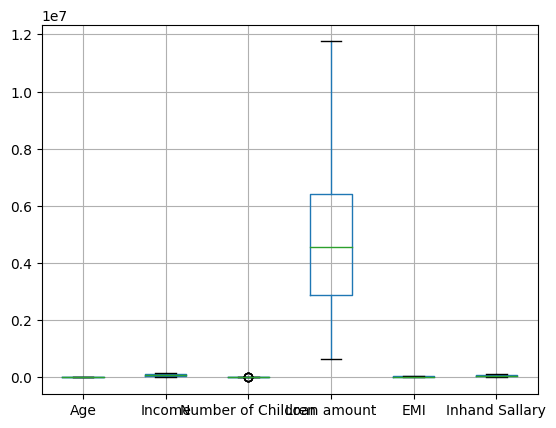

In [535]:
x_train.boxplot()
plt.show()

# Feature Engineering

### Training Data

In [536]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 123 non-null    int64  
 1   Gender              123 non-null    object 
 2   Income              123 non-null    int64  
 3   Education           123 non-null    object 
 4   Marital Status      113 non-null    object 
 5   Number of Children  123 non-null    int64  
 6   Home Ownership      117 non-null    object 
 7   Credit Score        123 non-null    object 
 8   Loan amount         119 non-null    float64
 9   EMI                 119 non-null    float64
 10  Inhand Sallary      123 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 11.5+ KB


In [537]:
x_train["Gender"].value_counts()

Female    62
Male      61
Name: Gender, dtype: int64

In [538]:
x_train["Gender"].replace({"Male":0,"Female":1},inplace=True)
Gender_values = {"Male":0,"Female":1}

In [539]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 123 non-null    int64  
 1   Gender              123 non-null    int64  
 2   Income              123 non-null    int64  
 3   Education           123 non-null    object 
 4   Marital Status      113 non-null    object 
 5   Number of Children  123 non-null    int64  
 6   Home Ownership      117 non-null    object 
 7   Credit Score        123 non-null    object 
 8   Loan amount         119 non-null    float64
 9   EMI                 119 non-null    float64
 10  Inhand Sallary      123 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [540]:
x_train["Education"].value_counts().to_dict()

{"Bachelor's Degree": 34,
 "Master's Degree": 27,
 'High School Diploma': 25,
 'Doctorate': 19,
 "Associate's Degree": 18}

In [541]:
x_train["Education"].replace({"Bachelor's Degree": 2,"Master's Degree": 3,'High School Diploma': 0,
                              'Doctorate': 4,"Associate's Degree": 1},inplace=True)

Education_values = {"Bachelor's Degree": 2,"Master's Degree": 3,'High School Diploma': 0,
                              'Doctorate': 4,"Associate's Degree": 1}

In [542]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 123 non-null    int64  
 1   Gender              123 non-null    int64  
 2   Income              123 non-null    int64  
 3   Education           123 non-null    int64  
 4   Marital Status      113 non-null    object 
 5   Number of Children  123 non-null    int64  
 6   Home Ownership      117 non-null    object 
 7   Credit Score        123 non-null    object 
 8   Loan amount         119 non-null    float64
 9   EMI                 119 non-null    float64
 10  Inhand Sallary      123 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 11.5+ KB


In [543]:
x_train["Marital Status"].isna().sum()

10

In [544]:
x_train["Marital Status"].value_counts()

Married    57
Single     56
Name: Marital Status, dtype: int64

In [545]:
x_train["Marital Status"].fillna(x_train["Marital Status"].mode()[0],inplace=True)

In [546]:
x_train["Marital Status"].isna().sum()

0

In [547]:
x_train["Marital Status"].value_counts()

Married    67
Single     56
Name: Marital Status, dtype: int64

In [548]:
x_train["Marital Status"].replace({"Married":1,"Single":0},inplace=True)
Marital_Status_values = {"Married":1,"Single":0}

In [549]:
x_train["Home Ownership"].isna().sum()

6

In [550]:
x_train["Home Ownership"].value_counts()

Owned     79
Rented    38
Name: Home Ownership, dtype: int64

In [551]:
x_train["Home Ownership"].fillna(x_train["Home Ownership"].mode()[0],inplace=True)

In [552]:
x_train["Home Ownership"].value_counts()

Owned     85
Rented    38
Name: Home Ownership, dtype: int64

In [553]:
x_train["Home Ownership"].replace({"Owned":1,"Rented":0},inplace=True)
Home_Owneship_values = {"Owned":1,"Rented":0}

In [554]:
x_train["Credit Score"].value_counts()

High       85
Average    27
Low        11
Name: Credit Score, dtype: int64

In [555]:
x_train["Credit Score"].replace({'High': 2, 'Average': 1, 'Low': 0},inplace=True)
Credit_Score_values = {'High': 2, 'Average': 1, 'Low': 0}

In [556]:
x_train["Loan amount"].isna().sum()

4

In [557]:
x_train["Loan amount"].fillna(x_train["Loan amount"].mean(),inplace=True)

In [558]:
x_train["Loan amount"].isna().sum()

0

In [559]:
x_train["EMI"].isna().sum()

4

In [560]:
x_train["EMI"].fillna(x_train["EMI"].mean(),inplace=True)

In [561]:
x_train["EMI"].isna().sum()

0

In [562]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 11 to 29
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 123 non-null    int64  
 1   Gender              123 non-null    int64  
 2   Income              123 non-null    int64  
 3   Education           123 non-null    int64  
 4   Marital Status      123 non-null    int64  
 5   Number of Children  123 non-null    int64  
 6   Home Ownership      123 non-null    int64  
 7   Credit Score        123 non-null    int64  
 8   Loan amount         123 non-null    float64
 9   EMI                 123 non-null    float64
 10  Inhand Sallary      123 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 11.5 KB


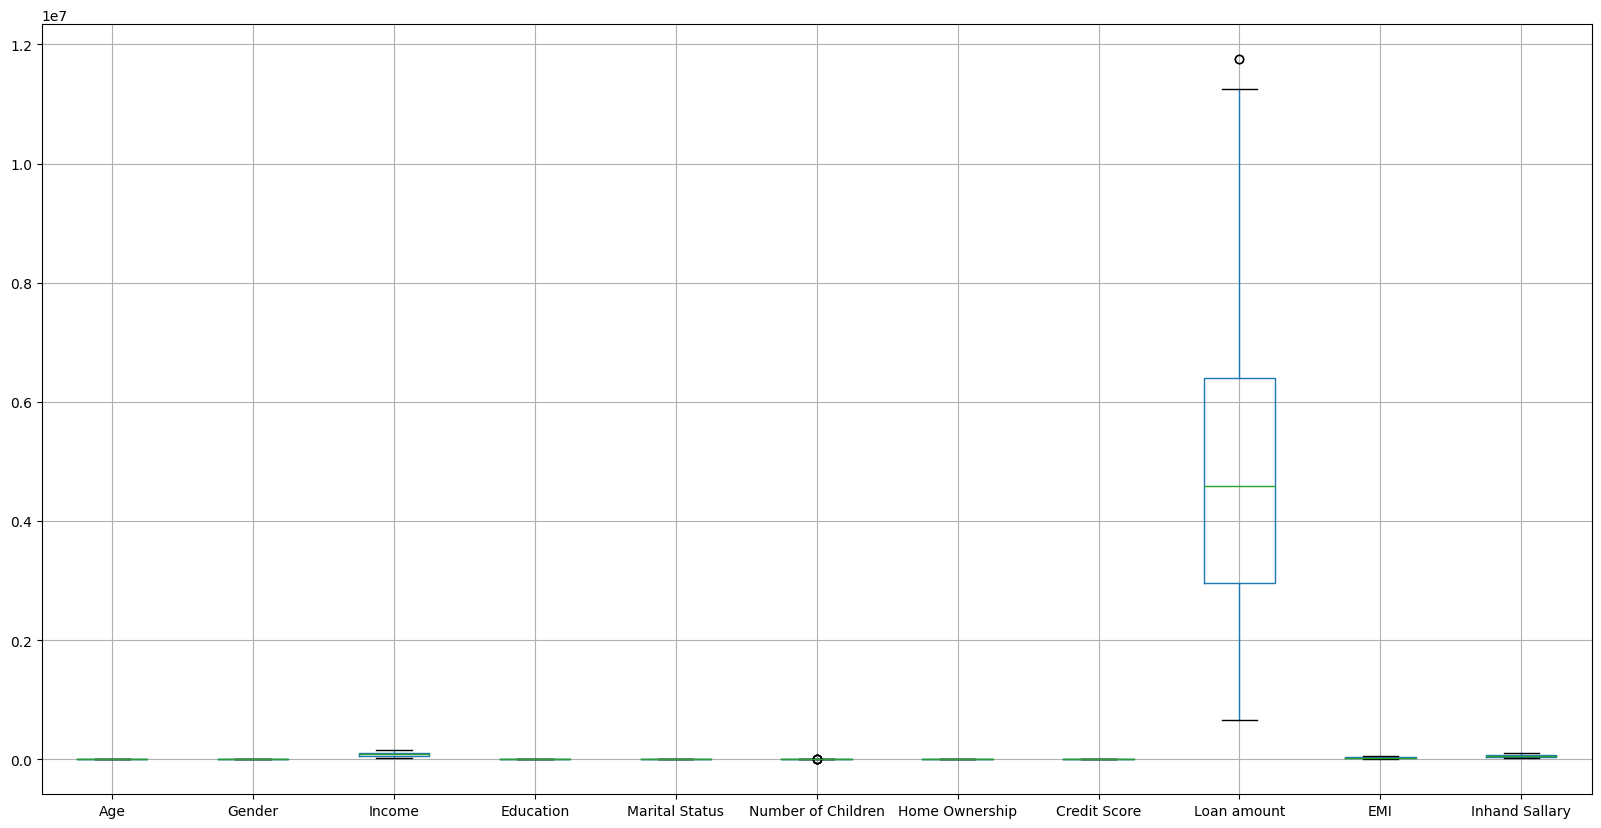

In [563]:
plt.figure(figsize=(20,10))
x_train.boxplot()
plt.show()

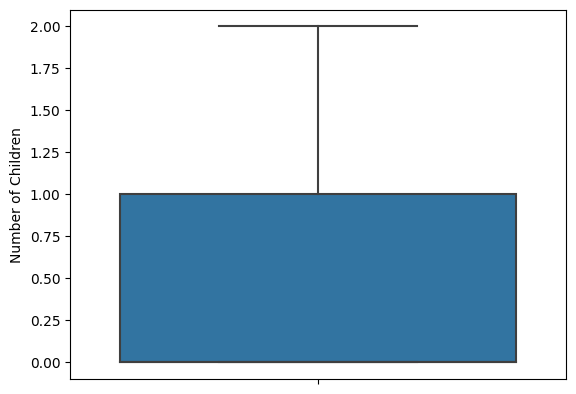

In [564]:
outlier_imputation(x_train["Number of Children"])
plt.show()

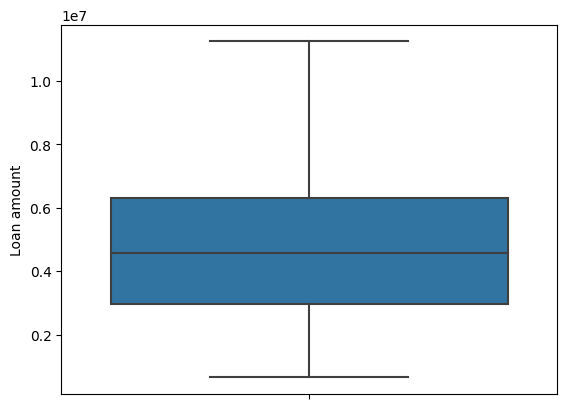

In [565]:
outlier_imputation(x_train["Loan amount"])
plt.show()

In [566]:
y_train.replace({"Approved":1,"Rejected":0},inplace=True)

### Testing Data

In [567]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 28 to 163
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 41 non-null     int64  
 1   Gender              41 non-null     object 
 2   Income              41 non-null     int64  
 3   Education           41 non-null     object 
 4   Marital Status      38 non-null     object 
 5   Number of Children  41 non-null     int64  
 6   Home Ownership      37 non-null     object 
 7   Credit Score        41 non-null     object 
 8   Loan amount         40 non-null     float64
 9   EMI                 40 non-null     float64
 10  Inhand Sallary      41 non-null     int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 3.8+ KB


In [568]:
x_test["Gender"].value_counts()

Female    24
Male      17
Name: Gender, dtype: int64

In [569]:
x_test["Gender"].replace({"Male":0,"Female":1},inplace=True)
Gender_values = {"Male":0,"Female":1}

In [570]:
x_test["Education"].value_counts().to_dict()

{'Doctorate': 12,
 "Master's Degree": 9,
 "Bachelor's Degree": 8,
 "Associate's Degree": 7,
 'High School Diploma': 5}

In [571]:
x_test["Education"].replace({"Bachelor's Degree": 2,"Master's Degree": 3,'High School Diploma': 0,
                              'Doctorate': 4,"Associate's Degree": 1},inplace=True)

Education_values = {"Bachelor's Degree": 2,"Master's Degree": 3,'High School Diploma': 0,
                              'Doctorate': 4,"Associate's Degree": 1}

In [572]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 28 to 163
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 41 non-null     int64  
 1   Gender              41 non-null     int64  
 2   Income              41 non-null     int64  
 3   Education           41 non-null     int64  
 4   Marital Status      38 non-null     object 
 5   Number of Children  41 non-null     int64  
 6   Home Ownership      37 non-null     object 
 7   Credit Score        41 non-null     object 
 8   Loan amount         40 non-null     float64
 9   EMI                 40 non-null     float64
 10  Inhand Sallary      41 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 3.8+ KB


In [573]:
x_test["Marital Status"].isna().sum()

3

In [574]:
x_test["Marital Status"].value_counts()

Married    22
Single     16
Name: Marital Status, dtype: int64

In [575]:
x_test["Marital Status"].fillna(x_test["Marital Status"].mode()[0],inplace=True)

In [576]:
x_test["Marital Status"].isna().sum()

0

In [577]:
x_test["Marital Status"].value_counts()

Married    25
Single     16
Name: Marital Status, dtype: int64

In [578]:
x_test["Marital Status"].replace({"Married":1,"Single":0},inplace=True)
Marital_Status_values = {"Married":1,"Single":0}

In [579]:
x_test["Home Ownership"].isna().sum()

4

In [580]:
x_test["Home Ownership"].value_counts()

Owned     26
Rented    11
Name: Home Ownership, dtype: int64

In [581]:
x_test["Home Ownership"].fillna(x_test["Home Ownership"].mode()[0],inplace=True)

In [582]:
x_test["Home Ownership"].value_counts()

Owned     30
Rented    11
Name: Home Ownership, dtype: int64

In [583]:
x_test["Home Ownership"].replace({"Owned":1,"Rented":0},inplace=True)
Home_Owneship_values = {"Owned":1,"Rented":0}

In [584]:
x_test["Credit Score"].value_counts()

High       28
Average     9
Low         4
Name: Credit Score, dtype: int64

In [585]:
x_test["Credit Score"].replace({'High': 2, 'Average': 1, 'Low': 0},inplace=True)
Credit_Score_values = {'High': 2, 'Average': 1, 'Low': 0}

In [586]:
x_test["Loan amount"].isna().sum()

1

In [587]:
x_test["Loan amount"].fillna(x_test["Loan amount"].mean(),inplace=True)

In [588]:
x_test["Loan amount"].isna().sum()

0

In [589]:
x_test["EMI"].isna().sum()

1

In [590]:
x_test["EMI"].fillna(x_test["EMI"].mean(),inplace=True)

In [591]:
x_test["EMI"].isna().sum()

0

In [592]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 28 to 163
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 41 non-null     int64  
 1   Gender              41 non-null     int64  
 2   Income              41 non-null     int64  
 3   Education           41 non-null     int64  
 4   Marital Status      41 non-null     int64  
 5   Number of Children  41 non-null     int64  
 6   Home Ownership      41 non-null     int64  
 7   Credit Score        41 non-null     int64  
 8   Loan amount         41 non-null     float64
 9   EMI                 41 non-null     float64
 10  Inhand Sallary      41 non-null     int64  
dtypes: float64(2), int64(9)
memory usage: 3.8 KB


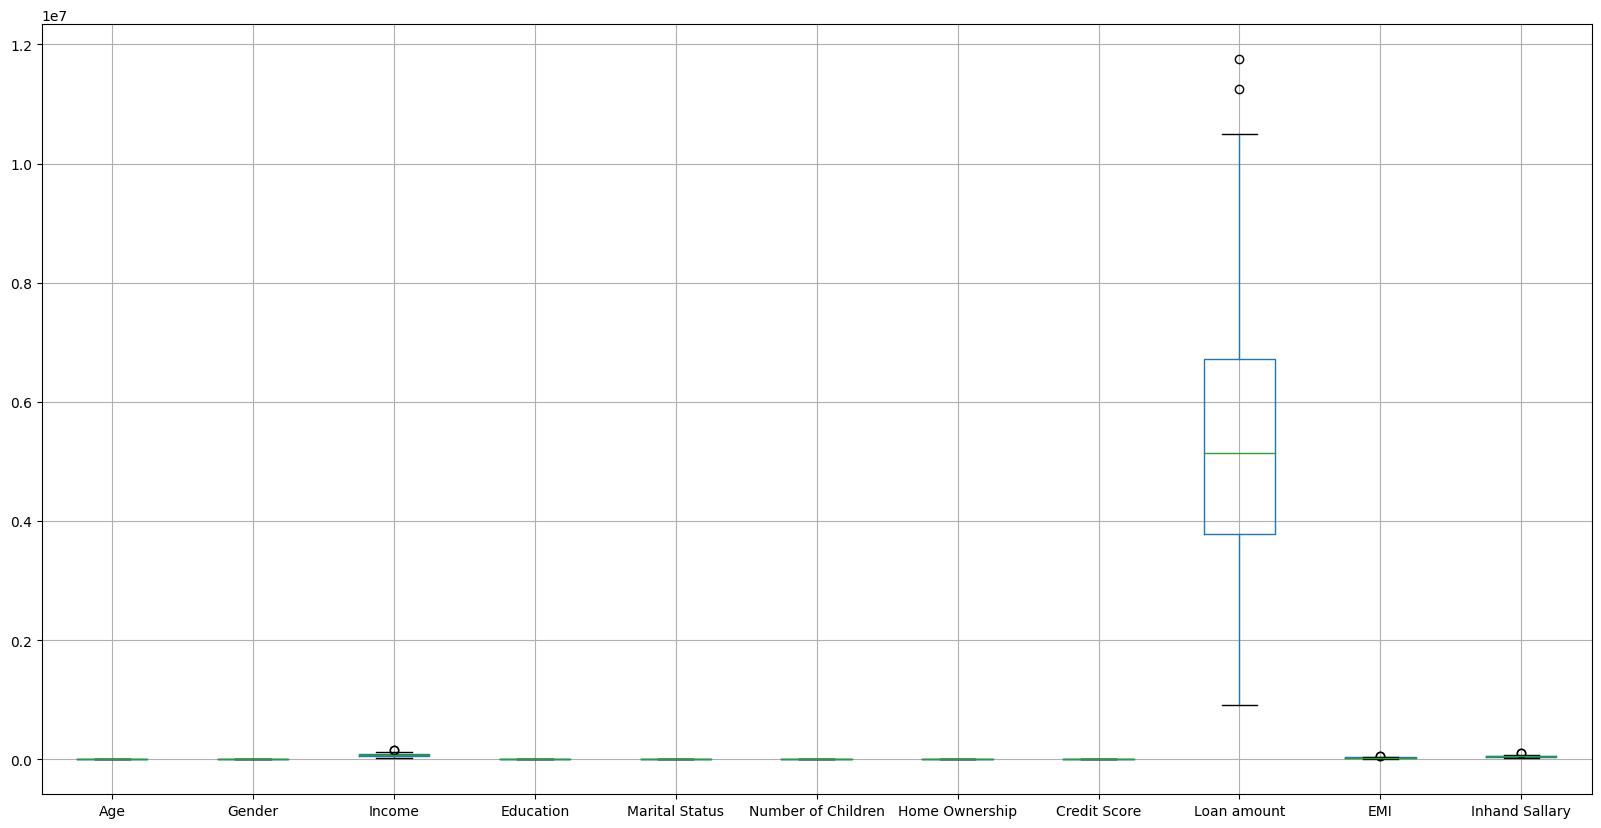

In [593]:
plt.figure(figsize=(20,10))
x_test.boxplot()
plt.show()

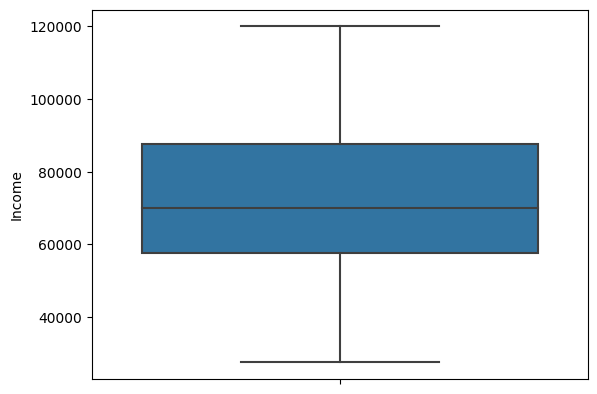

In [594]:
outlier_imputation(x_test["Income"])
plt.show()

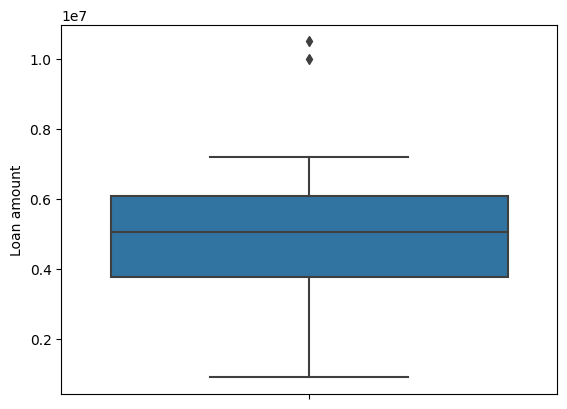

In [595]:
outlier_imputation(x_test["Loan amount"])
plt.show()

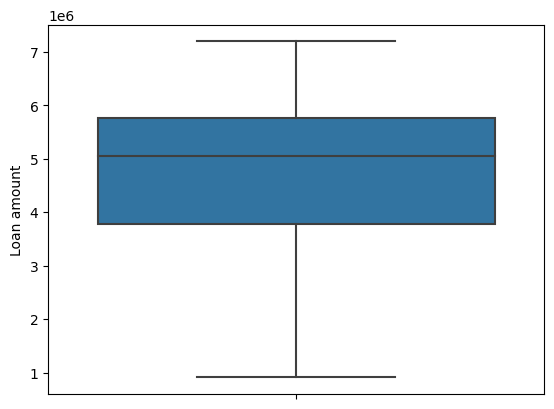

In [596]:
outlier_imputation(x_test["Loan amount"])
plt.show()

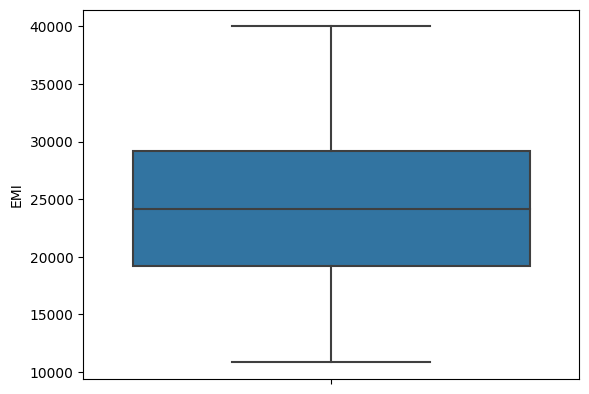

In [597]:
outlier_imputation(x_test["EMI"])
plt.show()

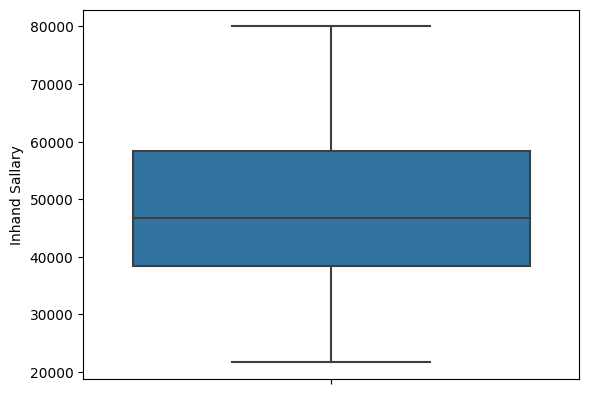

In [598]:
outlier_imputation(x_test["Inhand Sallary"])
plt.show()

In [599]:
y_test.replace({"Approved":1,"Rejected":0},inplace=True)

In [600]:
x_train, y_train = SMOTEN(k_neighbors=1).fit_resample(x_train,y_train)
y_train.value_counts()

1    103
0    103
Name: Eligibility, dtype: int64

In [601]:
x_test, y_test = SMOTEN(k_neighbors=1).fit_resample(x_test,y_test)
y_test.value_counts()

1    35
0    35
Name: Eligibility, dtype: int64

# Feature Selection

#### 1.kendall coc

In [602]:
cor_df = x_train.copy()
cor_df["Eligibility"] = y

cor_df["Eligibility"].replace({"Approved":1,"Rejected":0},inplace=True)
cor_df.corr('kendall').tail(1)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan amount,EMI,Inhand Sallary,Eligibility
Eligibility,-0.006651,-0.130367,-0.044954,-0.056762,-0.030459,-0.063854,-0.068591,-0.084547,-0.031343,-0.01337,-0.038036,1.0


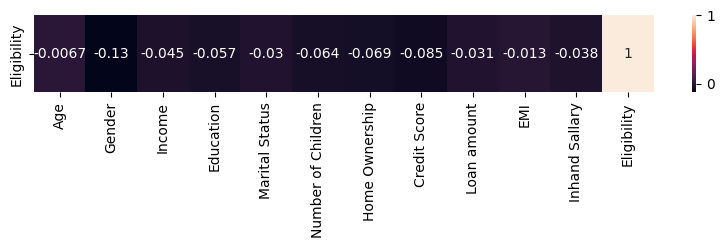

In [603]:
plt.figure(figsize=(10,1))
sns.heatmap(cor_df.corr('kendall').tail(1),annot=True)
plt.show()

#### 2. ANOVA Test

In [604]:
from sklearn.feature_selection import f_classif

f_val,p_val = f_classif(x_train,y_train)

In [605]:
df4 = pd.DataFrame({"f_val":f_val, "p_val":np.around(p_val,5)}, index=x_train.columns)
df4

,f_val,p_val
Age,163.444517,0.00000
Gender,9.917236,0.00188
Income,376.027919,0.00000
Education,137.046258,0.00000
Marital Status,65.029740,0.00000
Number of Children,54.541014,0.00000
Home Ownership,237.086777,0.00000
Credit Score,432.680576,0.00000
Loan amount,26.203184,0.00000
EMI,214.832550,0.00000


#### Feature Scaling

In [606]:
x_train_normal = normalization(x_train)
x_train_normal

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan amount,EMI,Inhand Sallary
0,0.928571,0.0,0.800000,0.50,1.0,0.0,1.0,1.0,0.141643,0.796296,0.796300
1,0.500000,1.0,0.272727,0.50,1.0,1.0,1.0,1.0,0.315392,0.259259,0.259267
2,0.750000,1.0,0.509091,0.00,1.0,0.5,1.0,1.0,0.260623,0.500000,0.500000
3,0.821429,1.0,0.454545,1.00,1.0,0.5,1.0,1.0,0.169027,0.444444,0.444444
4,0.357143,1.0,0.472727,1.00,1.0,0.5,1.0,1.0,0.617564,0.462963,0.462967
...,...,...,...,...,...,...,...,...,...,...,...
201,0.071429,1.0,0.072727,0.00,0.0,0.0,0.0,0.0,0.043437,0.055556,0.055556
202,0.142857,1.0,0.000000,0.00,1.0,0.0,0.0,0.0,0.383609,0.447557,0.074078
203,0.035714,1.0,0.109091,0.25,0.0,0.0,0.0,0.5,0.375826,0.092592,0.092600
204,0.035714,1.0,0.163636,0.25,0.0,0.0,0.0,0.5,0.457979,0.148148,0.148156


In [607]:
x_test_normal = normalization(x_test)
x_test_normal

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score,Loan amount,EMI,Inhand Sallary
0,0.96,1.0,0.405405,1.00,1.0,0.5,1.0,1.0,0.103339,0.371429,0.371419
1,0.40,1.0,0.513514,1.00,1.0,0.5,1.0,1.0,0.809221,0.485714,0.485711
2,0.76,0.0,0.648649,0.75,0.0,0.0,1.0,1.0,0.467409,0.628572,0.628564
3,0.64,0.0,1.000000,1.00,0.0,0.0,1.0,1.0,0.923688,1.000000,1.000000
4,0.28,0.0,0.324324,0.25,0.0,0.0,0.0,0.5,0.696343,0.285714,0.285704
...,...,...,...,...,...,...,...,...,...,...,...
65,0.08,1.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.046105,0.057143,0.057137
66,0.04,0.0,0.189189,0.25,0.0,0.0,0.0,0.5,0.456280,0.142857,0.142852
67,0.04,0.0,0.189189,0.25,0.0,0.0,0.0,0.5,0.456280,0.142857,0.142852
68,0.08,1.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.046105,0.057143,0.057137


# Model Building

### Adaptive Boosting Classifier

In [630]:
model_name = 'Adaptive Boosting Classifier'
adb_clf = adaboost_clf_training(x_train_normal,y_train)
adb_clf

AdaBoostClassifier(estimator=LogisticRegression(), random_state=39)

# Model Evaluation

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 2 33]]


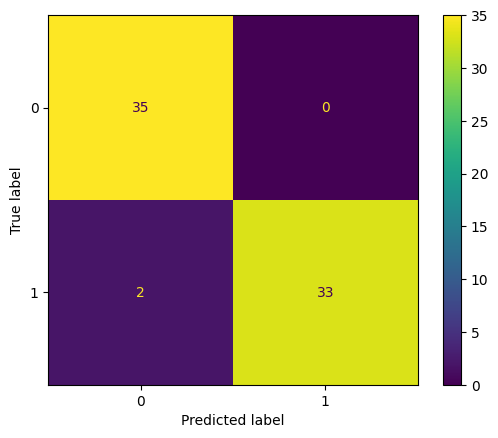

The Accuracy is :  0.9714285714285714
The Classification report is :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.94      0.97        35

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [ 11  92]]


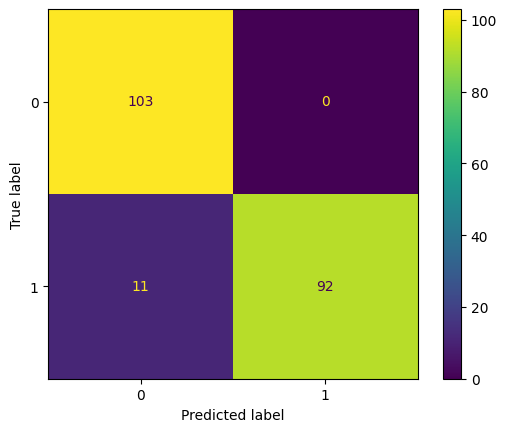

The accuracy is :  0.9466019417475728
The classification Report is :
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       103
           1       1.00      0.89      0.94       103

    accuracy                           0.95       206
   macro avg       0.95      0.95      0.95       206
weighted avg       0.95      0.95      0.95       206



In [631]:
# evaluation for testing data

model_evaluation_testing(adb_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(adb_clf,x_train_normal,y_train)

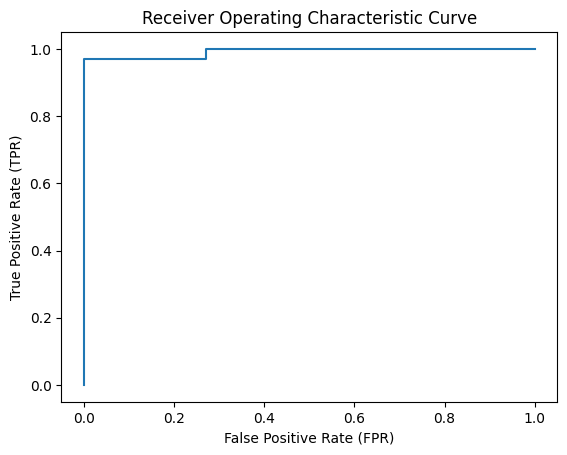

The AUC is :  0.9920821943632764


In [632]:
get_auc_roc_curve(adb_clf,x_train_normal,y_train)

# Hyper-parameter Tunning

In [635]:
gscv_adb_clf = adb_gscv_best_estimator(x_train_normal,y_train)
gscv_adb_clf

AdaBoostClassifier(learning_rate=0.039)

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 0 35]]


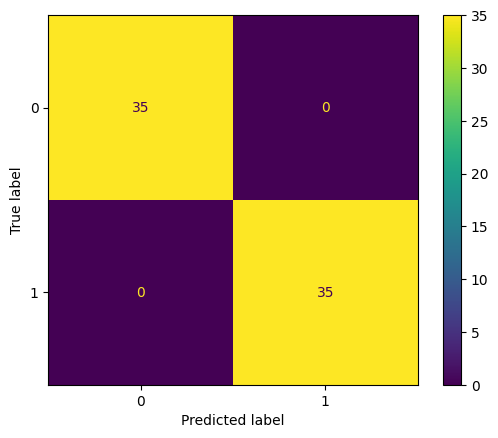

The Accuracy is :  1.0
The Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [  0 103]]


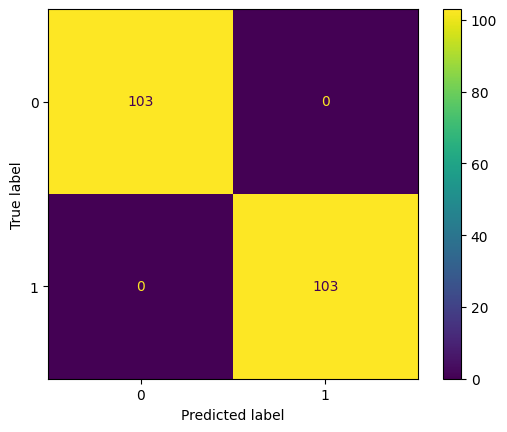

The accuracy is :  1.0
The classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [636]:
# evaluation for testing data

model_evaluation_testing(gscv_adb_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(gscv_adb_clf,x_train_normal,y_train)

In [637]:
rscv_adb_clf = adb_rscv_best_estimator(x_train_normal,y_train)
rscv_adb_clf

AdaBoostClassifier(learning_rate=0.41000000000000003, n_estimators=90)

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 0 35]]


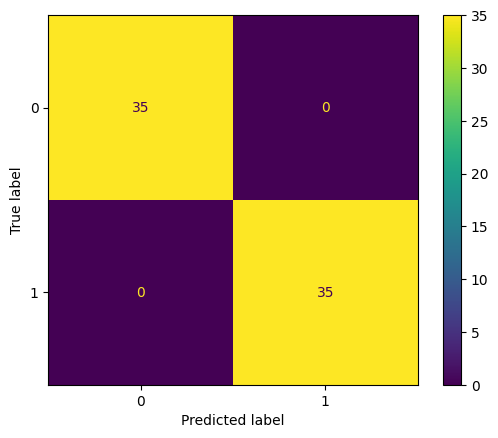

The Accuracy is :  1.0
The Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [  0 103]]


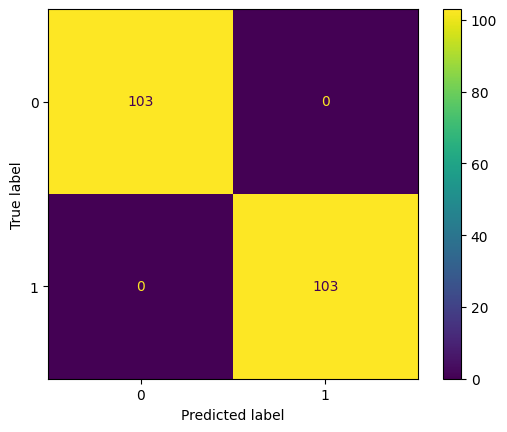

The accuracy is :  1.0
The classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [638]:
# evaluation for testing data

model_evaluation_testing(rscv_adb_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(rscv_adb_clf,x_train_normal,y_train)

### Decision Tree Classifier

In [619]:
model_name = 'Decision Tree Classifier'
dt_clf = dt_clf_training(x_train_normal,y_train)
dt_clf

DecisionTreeClassifier(random_state=18)

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 0 35]]


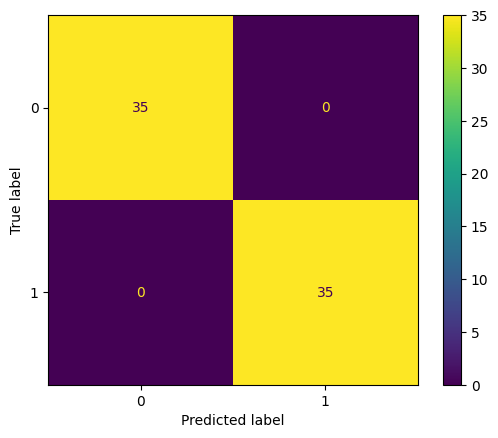

The Accuracy is :  1.0
The Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [  0 103]]


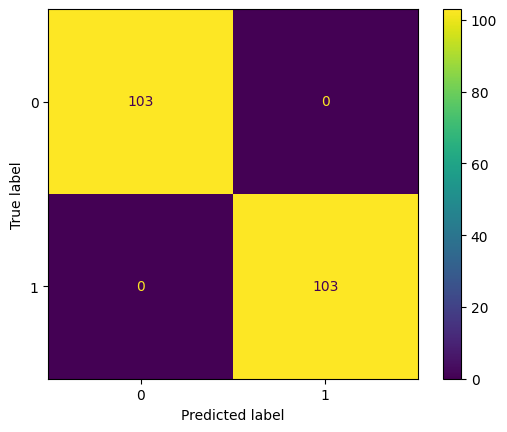

The accuracy is :  1.0
The classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [615]:
# evaluation for testing data

model_evaluation_testing(dt_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(dt_clf,x_train_normal,y_train)

# Hyper-parameter Tunniong

In [625]:
gscv_dt_clf = dt_gscv_best_estimator(x_train_normal,y_train)
gscv_dt_clf

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=8)

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 0 35]]


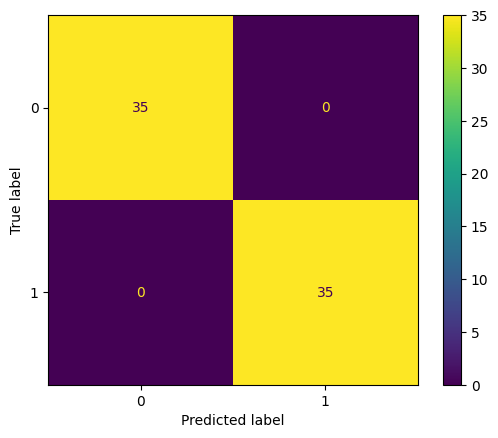

The Accuracy is :  1.0
The Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [  1 102]]


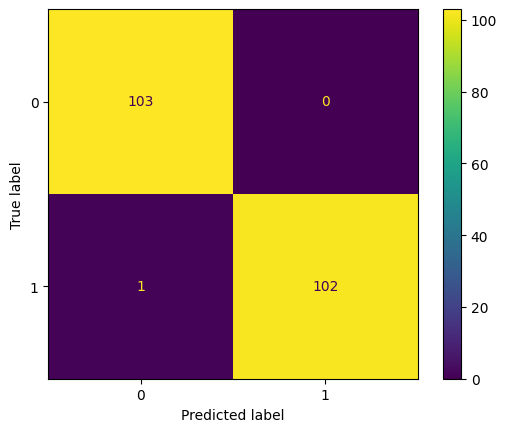

The accuracy is :  0.9951456310679612
The classification Report is :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [626]:
# evaluation for testing data

model_evaluation_testing(gscv_dt_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(gscv_dt_clf,x_train_normal,y_train)

In [620]:
rscv_dt_clf = dt_rscv_best_estimator(x_train_normal,y_train)
rscv_dt_clf

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10,
                       random_state=46)

************************************************** Testing Data **************************************************
The confusion Matrix is :
 [[35  0]
 [ 0 35]]


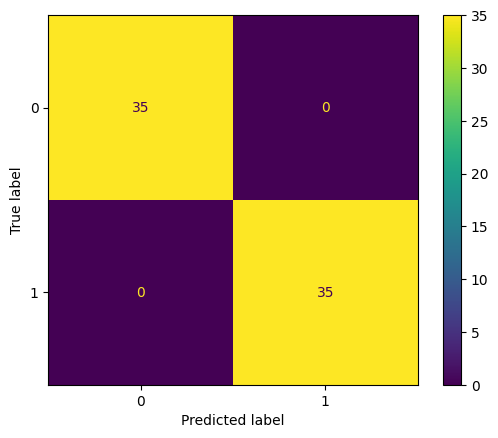

The Accuracy is :  1.0
The Classification report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

************************************************** Training Data **************************************************
The confusion matrix is :
 [[103   0]
 [  1 102]]


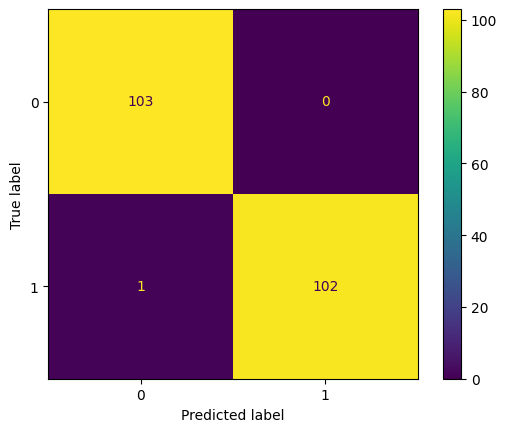

The accuracy is :  0.9951456310679612
The classification Report is :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       103
           1       1.00      0.99      1.00       103

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [621]:
# evaluation for testing data

model_evaluation_testing(rscv_dt_clf,x_test_normal,y_test)

# evaluation for training data

model_evaluation_training(rscv_dt_clf,x_train_normal,y_train)